# Goal: figure out why success drops on much larger grids

Exp 1: take OffsetWaypoint run (4017_1), investigate why it fails on much larger grids (30% success on 15x15, trained on 6x6).

Hypothesis 1 - the agent position and goal are larger than seen before, failure b/c OOD

Hypothesis 2 - the grid is larger than seen before, failure b/c OOD

Hypothesis 3 - advice is OOD, failure b/c OOD [Seems unlikely b/c of the H1 tests]

Hypothesis 4 - velocity or relative position within grid (e.g. dist to wall) are OOD [Seems unlikely b/c of the H1 tests]

# Testing Hypothesis 1

 - Test 1 - Test generalization of agent which only gets to see advice, or only advice + velocity.
 - Test 2 - Plot distribution of agent positions and goals for successful vs unsuccessful test envs vs training envs.
 - Test 3 - Check gradients (or try manually changing pieces of the input) to see what changes the agent's response.

## Test 1 - Test generalization of agent which only gets to see advice, or only advice + velocity.

Results: agents which do not see the extraneous details generalize quite well! This suggests that the issue is that the agent sees the agent position, the goal, and/or the grid.
TRAIN ENV:
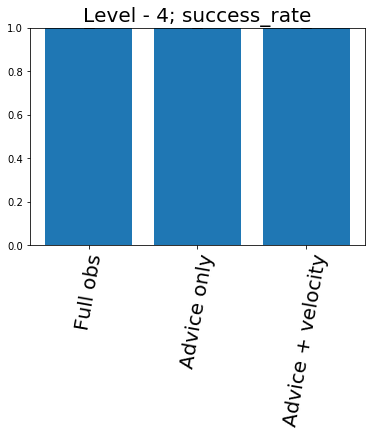
TEST ENVS:
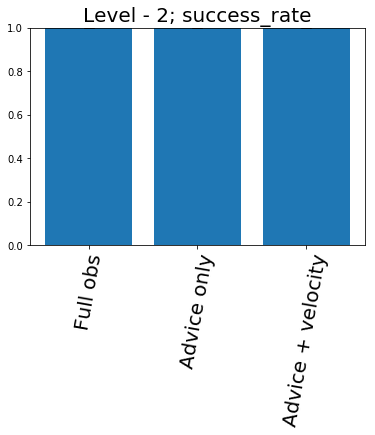
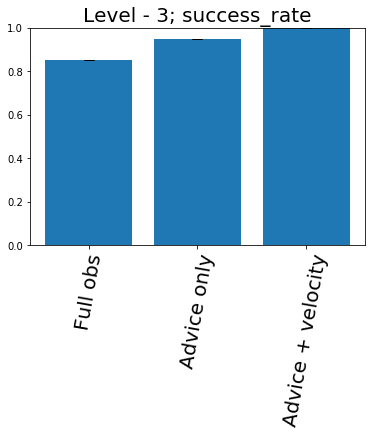
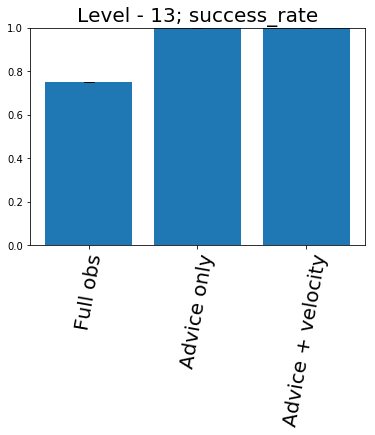
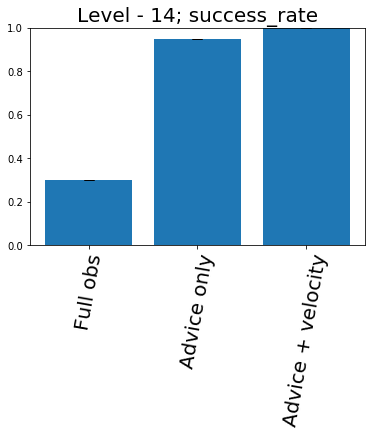

## Test 2 - Test 2 - Plot distribution of agent positions and goals for successful vs unsuccessful test envs vs training envs.

In [20]:
p = '/home/olivia/Documents/Teachable/babyai/data/L14Buffer_1/buffer/train_buffer.pkl'
import pickle as pkl
with open(p, 'rb') as f:
    l14 = pkl.load(f)
l14 = l14[14]

In [21]:
p4 = '/home/olivia/Documents/Teachable/babyai/data/L4Buffer_1/buffer/train_buffer.pkl'

with open(p4, 'rb') as f:
    l4 = pkl.load(f)
l4 = l4[4]

In [2]:
import os
os.getcwd()

'/home/olivia/Documents/Experiments/choosing_good_features'

In [10]:
cd meta-mb-internal

/home/olivia/Documents/Teachable/babyai/meta-mb-internal


In [ ]:
l4_obs = [o['obs'] for o in l4.obs]
l4_success = [oful for o in l4.obs]

## Test 3 - Check gradients (or try manually changing pieces of the input) to see what changes the agent's response.

- Load model
- Find a trajectory where the agent fails
- Reset to a state where the agent took the wrong action
- Modify elements of the input, see if the output changes

- Load model
- Find a trajectory where the agent succeeds
- change the goal, see if the agent still succeeds --> yep!
- Change the agent pos, see if the agent still succeeds --> 60% on L2, 80% on L4. It's a weird failure where the agent gets stuck near the goal.
- change the grid, see if the agent still succeeds --> yep!